In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
f = r.TFile("./data/gm2offline_ana_18236461_1544537266.1865.root")

In [3]:
f.cd("SimuTreeMaker")
f.ls()

t = f.Get("SimuTreeMaker").Get("gm2ringsimTree")

TFile**		./data/gm2offline_ana_18236461_1544537266.1865.root	
 TFile*		./data/gm2offline_ana_18236461_1544537266.1865.root	
  TDirectoryFile*		SimuTreeMaker	SimuTreeMaker (SimuTreeMaker) folder
   KEY: TTree	gm2ringsimTree;4	gm2ringsimTree
   KEY: TTree	gm2ringsimTree;3	gm2ringsimTree
  KEY: TDirectoryFile	SimuTreeMaker;1	SimuTreeMaker (SimuTreeMaker) folder


In [4]:
t.Print()

******************************************************************************
*Tree    :gm2ringsimTree: gm2ringsimTree                                         *
*Entries :   392000 : Total =       233308624 bytes  File  Size =  101487426 *
*        :          : Tree compression factor =   2.30                       *
******************************************************************************
*Br    0 :runNum    : runNum/I                                               *
*Entries :   392000 : Total  Size=    1570163 bytes  File Size  =      10129 *
*Baskets :       18 : Basket Size=    1039872 bytes  Compression= 154.95     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/I                                            *
*Entries :   392000 : Total  Size=    1570229 bytes  File Size  =      10180 *
*Baskets :       18 : Basket Size=    1039872 bytes  Compression= 154.18     *
*...............................................

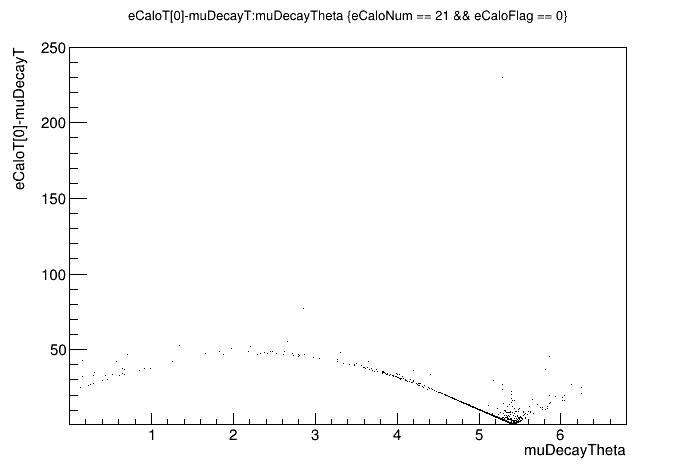

In [5]:
c = r.TCanvas()
t.Draw("eCaloT[0]-muDecayT:muDecayTheta","eCaloNum == 21 && eCaloFlag == 0","")
c.Draw()

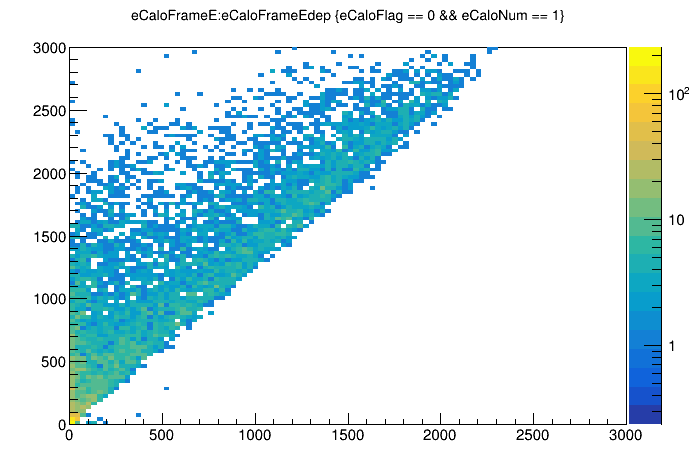

In [6]:
c = r.TCanvas()
t.Draw("eCaloFrameE:eCaloFrameEdep>>hist(100,0,3000,100,0,3000)","eCaloFlag == 0 && eCaloNum == 1","colz")
c.SetLogz()
c.Draw()

In [92]:
condition = "eCaloNum == 1"
draw = "eCaloNum"
h = r.TH1D("h","h",26,0,26)

In [93]:
print(h)

<ROOT.TH1D object ("h") at 0x7f551e3af790>


7915.0


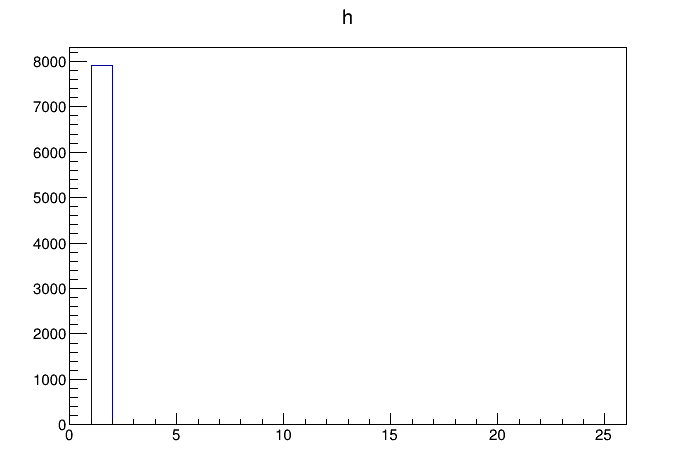

In [94]:
c = r.TCanvas()
t.Draw(draw+">>h",condition,"")
print(h.GetEntries())
#c.SetLogy()
h.SetDirectory(0)
c.Draw()

In [107]:
fout = r.TFile("./testOut.root","recreate")
#create a tree to store the output, and fill it based on the condition.
tfinal = t.CopyTree( condition )
tfinal.SetLineColor(2)

h2 = h.Clone("h2")
h2.Reset()
h2.SetLineColor(2)

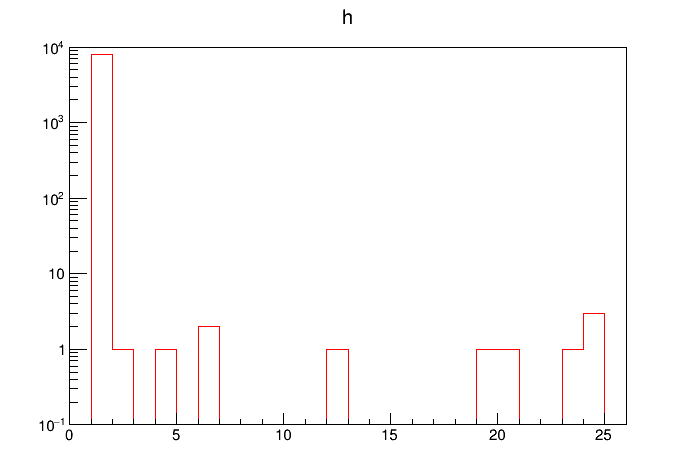

In [109]:
c = r.TCanvas()
tfinal.Draw(draw+">>h2","","")
h2.Draw()
c.SetLogy()
c.Draw()

In [110]:
print(h1,h2)

<ROOT.TH1D object ("h") at 0x7fffdbb2ad10> <ROOT.TH1D object ("h2") at 0x7f551b43f700>


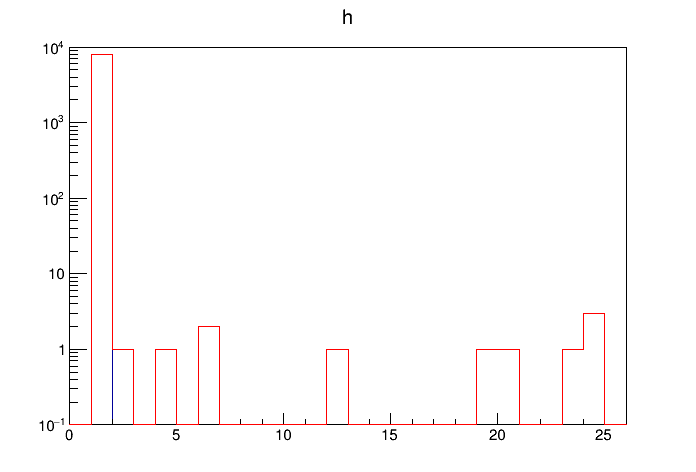

In [111]:
c = r.TCanvas()
h.Draw()
h.GetYaxis().SetRangeUser(0.1,10000)
h2.Draw("same")
c.SetLogy()
c.Draw()

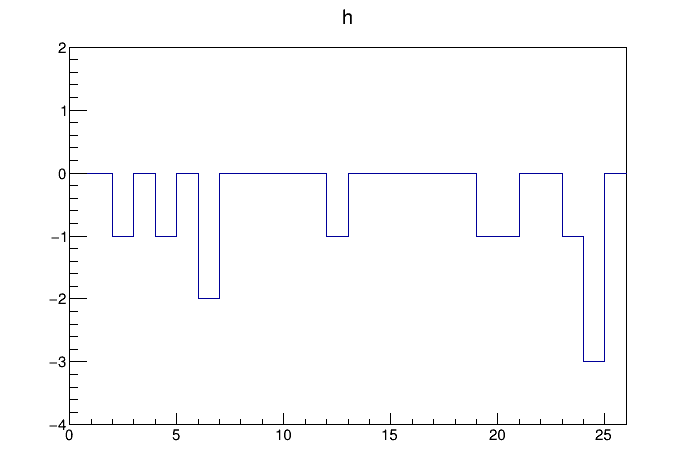

In [113]:
hDiff = h.Clone("hDiff")
hDiff.Add(h2,-1)

c = r.TCanvas()
hDiff.Draw()
hDiff.GetYaxis().SetRangeUser(-4,2)
c.Draw()